<a href="https://colab.research.google.com/github/avery32/group_project/blob/main/logisticregressionufo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('/content/ufo_clean_data.csv')

# Check column names and identify the column containing date and time information
print(df.columns)  # Print the column names of your dataframe
# If you see a column representing datetime, replace 'date_time_column' with the actual column name below
# otherwise rename the column that has the date/time information
df['datetime'] = pd.to_datetime(df['datetime']) # Assuming the datetime column is named 'date_time_column'

# Add new numerical columns
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

# Now drop the original datetime
df = df.drop(columns=['datetime'])


Index(['datetime', 'city', 'country', 'shape', 'duration (seconds)',
       'date posted', 'latitude', 'longitude ', 'month', 'year', 'month_num',
       'log_duration', 'date'],
      dtype='object')


In [ ]:
# Step 1: Create your binary target column
df['is_us'] = (df['country'] == 'US').astype(int)

# Step 2: Define features — only numeric and one-hot shape columns
feature_cols = ['duration (seconds)', 'month_num', 'log_duration', 'latitude', 'longitude '] + \
               [col for col in df.columns if col.startswith('shape_')]

# Step 3: Create X and y
X = df[feature_cols]
y = df['is_us']

# Step 4: Train-test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      0.48      0.65      1132
           1       0.96      1.00      0.98     12669

    accuracy                           0.96     13801
   macro avg       0.98      0.74      0.81     13801
weighted avg       0.96      0.96      0.95     13801



In [ ]:
# Get feature names and coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients.sort_values(by='Coefficient', ascending=False))


              Feature   Coefficient
2        log_duration  7.832951e-02
1           month_num  2.327309e-02
0  duration (seconds) -5.522964e-08
4          longitude  -1.012538e-01
3            latitude -2.554760e-01


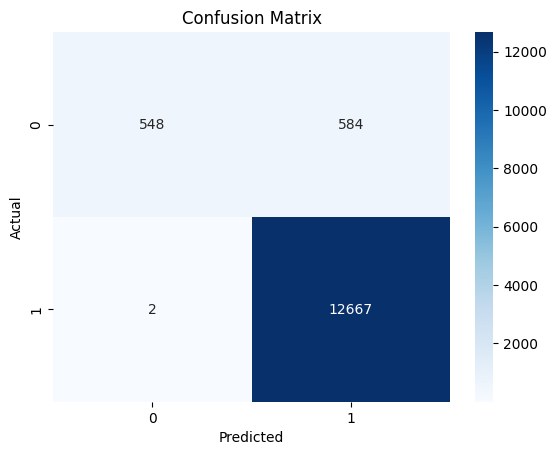

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
